# Module D: Seth's EDA

In [1]:
TODAY = '2020-04-09'

In [2]:
import os
import pathlib
working_dir = pathlib.Path().absolute()
os.chdir(working_dir)

In [3]:
import pandas as pd
import numpy as np

from matplotlib import pyplot
import matplotlib.pylab as plt 
%matplotlib inline

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import descartes 
import geopandas as gpd
from shapely.geometry import Point, Polygon
from geopy import geocoders
from geopy.geocoders import Nominatim
import time

In [4]:
# Parsers
dateparse0 = lambda x: pd.datetime.strptime(x, "%m/%d/%Y %H:%M")
dateparse1 = lambda x: pd.datetime.strptime(x, "%m/%d/%y %H:%M")
dateparse2 = lambda x: pd.datetime.strptime(x, "%Y-%m-%d" + "T" + "%H:%M:%S")
dateparse3 = lambda x: pd.datetime.strptime(x, "%Y-%m-%d %H:%M:%S")
dateparse4 = lambda x: pd.datetime.strptime(x, "%m/%d/%y %H:%M")

In [5]:
# Format 0 - the following columns exist: 
# Dates: 01-22-2020 to 02-29-2020
df_full_early = []
format0 = ["01-22-2020", "01-31-2020", "02-01-2020"]
for ii in format0: 
    df_early = pd.read_csv('data/CSSEGIS_COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/'+ii +'.csv',
                           parse_dates=['Last Update'],
                           date_parser=dateparse0)
    df_full_early.append(df_early)

for ii in np.arange(23,31,1):
    df = pd.read_csv('data/CSSEGIS_COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/01-'+str(ii)+'-2020.csv',
                       parse_dates=['Last Update'],
                       date_parser=dateparse1)
    df_full_early.append(df)

# Inexplicable third date time format
for ii in np.arange(2,30,1):
    if (ii < 10): 
        label = "0" + str(ii)
    else: 
        label = str(ii)
    df = pd.read_csv('data/CSSEGIS_COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/02-'+label+'-2020.csv',
                       parse_dates=['Last Update'],
                       date_parser=dateparse2)
    df_full_early.append(df)

    
# Write Early files
df_to_write1 = pd.concat(df_full_early, axis=0, ignore_index=True).sort_values(by=["Last Update", "Country/Region"])
df_to_write1 = df_to_write1.drop_duplicates(subset=df_to_write1.columns).reset_index(drop=True)
df_to_write1

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,Hong Kong,Hong Kong,2020-01-22 17:00:00,NaN,NaN,NaN
1,NaN,Japan,2020-01-22 17:00:00,2.0,NaN,NaN
2,Macau,Macau,2020-01-22 17:00:00,1.0,NaN,NaN
3,Anhui,Mainland China,2020-01-22 17:00:00,1.0,NaN,NaN
4,Beijing,Mainland China,2020-01-22 17:00:00,14.0,NaN,NaN
...,...,...,...,...,...,...
1790,NaN,Norway,2020-02-29 23:13:06,15.0,0.0,0.0
1791,"Toronto, ON",Canada,2020-02-29 23:23:13,10.0,0.0,2.0
1792,British Columbia,Canada,2020-02-29 23:23:13,8.0,0.0,3.0
1793,Hainan,Mainland China,2020-02-29 23:43:02,168.0,5.0,148.0


In [6]:
df_to_write1.to_csv(r'seth/df_format1.csv', index = False, header=True)

In [7]:
# Format 2 - columns added
# Lat long added 3/1 to 3/21 - HOWEVER, some data was backlogged in these .csvs all the way to 3/1
date1 = '2020-03-01'
date2 = '2020-03-21'
format2_dates = pd.date_range(date1, date2).strftime("%m-%d-%Y").tolist()
df_format2 = []

for label in format2_dates:
    df = pd.read_csv('data/CSSEGIS_COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/'+label+'.csv',
                       parse_dates=['Last Update'],
                       date_parser=dateparse2)
    df_format2.append(df)

df_to_write2 = pd.concat(df_format2, axis=0, ignore_index=True).sort_values(by=["Last Update", "Country/Region"]).reset_index(drop=True)
df_to_write2 = df_to_write2.drop_duplicates(subset=df_to_write2.columns).reset_index(drop=True)
df_to_write2

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
0,"Los Angeles, CA",US,2020-02-01 19:53:03,1,0,0,34.0522,-118.2437
1,"Orange, CA",US,2020-02-01 19:53:03,1,0,0,33.7879,-117.8531
2,"San Benito, CA",US,2020-02-03 03:53:02,2,0,0,36.5761,-120.9876
3,"Madison, WI",US,2020-02-05 21:53:02,1,0,0,43.0731,-89.4012
4,NaN,Sri Lanka,2020-02-08 03:43:03,1,0,1,7.0000,81.0000
...,...,...,...,...,...,...,...,...
3277,North Dakota,US,2020-03-21 23:13:18,28,0,0,47.5289,-99.7840
3278,Alaska,US,2020-03-21 23:13:18,15,0,0,61.3707,-152.4044
3279,NaN,Cape Verde,2020-03-21 23:43:02,1,0,0,15.1111,-23.6167
3280,NaN,Papua New Guinea,2020-03-21 23:43:02,1,0,0,-6.3150,143.9555


In [8]:
df_to_write2.to_csv(r'seth/df_format2.csv', index = False, header=True)

In [12]:
# Format 3: Lat and Long_, Province_State, Country_Region, Last_Update columns renamed, 
# date format changes again, columns for Active, FIPS, Admin2, Combined_Key are adde
# Dates: 03-22-2020 - Present

date1 = '2020-03-22'
format3_dates = pd.date_range(date1, TODAY).strftime("%m-%d-%Y").tolist()
df_format3 = []
dateparse3 = lambda x: pd.datetime.strptime(x, "%Y-%m-%d %H:%M:%S")

for label in format3_dates:
    if (label == format3_dates[0]):
        parser = dateparse1
    elif (label == "03-29-2020" or label == "03-30-2020" 
          or label == "04-06-2020" or label =="03-28-2020" 
          or label == "04-02-2020" or label == "04-04-2020"): 

        parser = lambda x: pd.datetime.strptime(x, "%m/%d/%y %H:%M")
    else: 
        parser = dateparse3
    df = pd.read_csv('data/CSSEGIS_COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/'+label+'.csv',
                       parse_dates=['Last_Update'],
                       date_parser=parser)
    df_format3.append(df)

In [13]:
df_to_write3 = pd.concat(df_format3, axis=0, ignore_index=True).sort_values(by=["Last_Update", "Country_Region"]).reset_index(drop=True)
df_to_write3 = df_to_write3.drop_duplicates(subset=df_to_write3.columns).reset_index(drop=True)
df_to_write3 = df_to_write3.rename(columns = {"Province_State": "Province/State","Country_Region": "Country/Region","Last_Update": "Last Update", "Lat": "Latitude", "Long_": "Longitude"})
df_to_write3

,FIPS,Admin2,Province/State,Country/Region,Last Update,Latitude,Longitude,Confirmed,Deaths,Recovered,Active,Combined_Key
0,NaN,NaN,Tibet,China,2020-02-23 11:19:00,31.6927,88.0924,1,0,1,0,"Tibet, China"
1,NaN,NaN,Qinghai,China,2020-02-23 11:19:00,35.7452,95.9956,18,0,18,0,"Qinghai, China"
2,NaN,NaN,Qinghai,China,2020-02-23 11:19:02,35.7452,95.9956,18,0,18,0,"Qinghai, China"
3,NaN,NaN,Tibet,China,2020-02-23 11:19:02,31.6927,88.0924,1,0,1,0,"Tibet, China"
4,NaN,NaN,Anhui,China,2020-03-08 05:19:00,31.8257,117.2264,990,6,984,0,"Anhui, China"
...,...,...,...,...,...,...,...,...,...,...,...,...
57590,NaN,NaN,Queensland,Australia,2020-04-09 23:09:19,-27.4698,153.0251,953,4,345,604,"Queensland, Australia"
57591,NaN,NaN,South Australia,Australia,2020-04-09 23:09:19,-34.9285,138.6007,420,3,120,297,"South Australia, Australia"
57592,NaN,NaN,Tasmania,Australia,2020-04-09 23:09:19,-42.8821,147.3272,111,3,48,60,"Tasmania, Australia"
57593,NaN,NaN,Victoria,Australia,2020-04-09 23:09:19,-37.8136,144.9631,1228,12,736,480,"Victoria, Australia"


In [14]:
df_to_write3.to_csv(r'seth/df_format3.csv', index = False, header=True)

In [15]:
df_full = pd.concat([df_to_write1,df_to_write2,df_to_write3], axis = 0, sort=False)

In [30]:
df_full.to_csv(r'seth/df_full.csv', index = False, header=True)
df_full.sort_values(by=["Country/Region", "Last Update"])

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude,FIPS,Admin2,Active,Combined_Key
1697,NaN,Azerbaijan,2020-02-28 15:03:26,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1487,NaN,Afghanistan,2020-02-24 23:33:02,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
16,NaN,Afghanistan,2020-02-24 23:33:02,1.0,0.0,0.0,33.000000,65.000000,NaN,NaN,NaN,NaN
723,NaN,Afghanistan,2020-03-08 04:53:03,4.0,0.0,0.0,33.000000,65.000000,NaN,NaN,NaN,NaN
1046,NaN,Afghanistan,2020-03-10 12:33:02,5.0,0.0,0.0,33.000000,65.000000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
49217,NaN,Zimbabwe,2020-04-07 23:04:29,11.0,2.0,0.0,-19.015438,29.154857,NaN,NaN,9.0,Zimbabwe
52057,NaN,Zimbabwe,2020-04-08 22:51:39,11.0,3.0,0.0,-19.015438,29.154857,NaN,NaN,8.0,Zimbabwe
54922,NaN,Zimbabwe,2020-04-09 23:02:19,11.0,3.0,0.0,-19.015438,29.154857,NaN,NaN,8.0,Zimbabwe
1102,NaN,occupied Palestinian territory,2020-03-10 19:13:21,25.0,0.0,0.0,31.952200,35.233200,NaN,NaN,NaN,NaN


In [31]:
df_full.sort_values(by=["Country/Region", "Last Update"])

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude,FIPS,Admin2,Active,Combined_Key
0,Hong Kong,Hong Kong,2020-01-22 17:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,Liaoning,Mainland China,2020-01-22 17:00:00,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,Ningxia,Mainland China,2020-01-22 17:00:00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,Qinghai,Mainland China,2020-01-22 17:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,Shaanxi,Mainland China,2020-01-22 17:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
57589,Northern Territory,Australia,2020-04-09 23:09:19,28.0,0.0,2.0,-12.4634,130.8456,NaN,NaN,26.0,"Northern Territory, Australia"
57590,Queensland,Australia,2020-04-09 23:09:19,953.0,4.0,345.0,-27.4698,153.0251,NaN,NaN,604.0,"Queensland, Australia"
57591,South Australia,Australia,2020-04-09 23:09:19,420.0,3.0,120.0,-34.9285,138.6007,NaN,NaN,297.0,"South Australia, Australia"
57592,Tasmania,Australia,2020-04-09 23:09:19,111.0,3.0,48.0,-42.8821,147.3272,NaN,NaN,60.0,"Tasmania, Australia"


In [ ]:
for ii in range(57):
    countries = df_full_geo["Country/Region	"][pd.isna(df_full_geo["Latitude"])].dropna()[ii:ii + 30]
    if ii == 57: 
        provinces = df_full_geo["Country/Region	"][pd.isna(df_full["Latitude"])].dropna()[ii:ii + 17]

    for idx, province in enumerate(provinces):
        loc = geolocator.geocode(province)
        print(loc.latitude, idx)
        try: 
            df_full_geo["Latitude"][np.where(provinces == province)] = loc.latitude
            df_full_geo["Longitude"][np.where(provinces == province)] = loc.longitude
        except OSError: 
            pass
        except: 
            pass
        
    time.sleep(3)


In [124]:
worldmap = gpd.read_file("../covid/seth/map/Countries_WGS84.shp")
# Time Series - Global confirmed cases
ts_global_confirmed = pd.read_csv('../covid/CSSEGIS_COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

coords = df_full_geo[["Province/State", "Confirmed","Latitude","Longitude"]]
coords = coords.dropna().drop_duplicates(subset=coords.columns).reset_index(drop=True)
coords

type(coords["Longitude"])
geometry = [Point(xy) for xy in zip(coords["Longitude"], coords["Latitude"])]
geo_df = gpd.GeoDataFrame(coords, crs={'init': 'epsg:4326'}, geometry = geometry)
geo_df.head()


method

NameError: name 'geo_df' is not defined

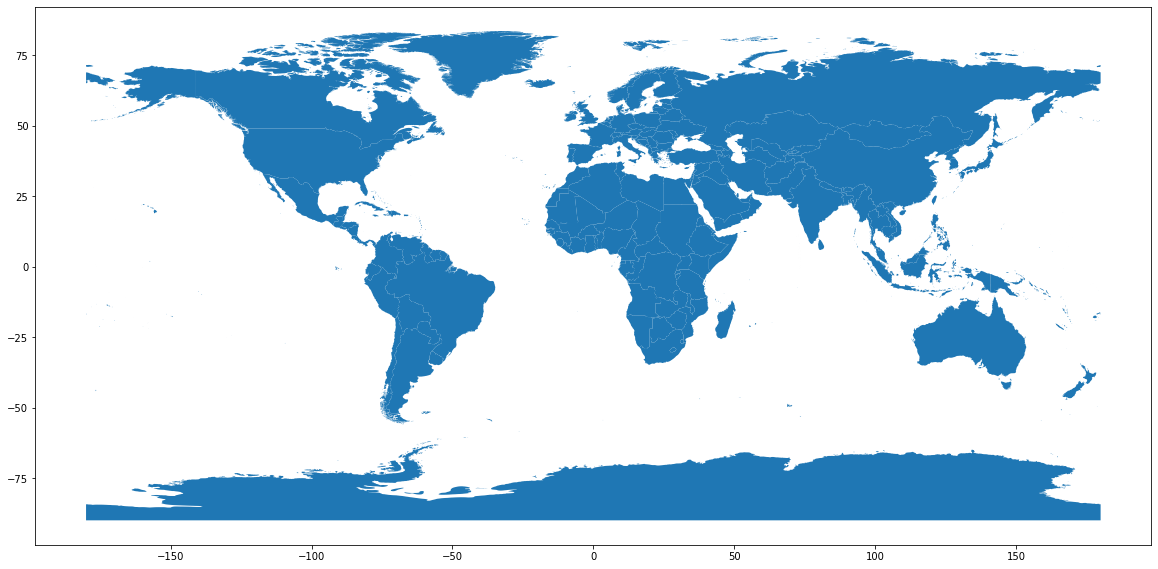

In [28]:
fig, ax = plt.subplots(figsize = (20,20))
worldmap = gpd.read_file("../covid/seth/map/Countries_WGS84.shp")
worldmap.plot(ax = ax)
geo_df.plot(ax = ax, markersize = geo_df["Confirmed"]/10, 
            color ="red", marker = 'o', label = "Confirmed Cases", alpha=0.5)


# Midas

In [27]:
pd.read_csv("../covid/data/midas_COVID-19/data/cases/united states of america/nytimes_covid19_data/20200410_us-states.csv")

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0
...,...,...,...,...,...
2100,2020-04-09,Virginia,51,4042,109
2101,2020-04-09,Washington,53,9608,478
2102,2020-04-09,West Virginia,54,524,5
2103,2020-04-09,Wisconsin,55,2885,116
